In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install pandas scipy


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('amazon.csv')


In [5]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [7]:
print(df['category'])

0       Computers&Accessories|Accessories&Peripherals|...
1       Computers&Accessories|Accessories&Peripherals|...
2       Computers&Accessories|Accessories&Peripherals|...
3       Computers&Accessories|Accessories&Peripherals|...
4       Computers&Accessories|Accessories&Peripherals|...
                              ...                        
1460    Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
1461    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1462    Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
1463    Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...
1464    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
Name: category, Length: 1465, dtype: object


In [8]:
# split category column into multiple columns on '|' delimiter.
catsplit = df['category'].str.split('|', expand=True)


# copy selected columns to a new dataframe df1.
df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()
catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3', 3:'category_4', 4:'category_5'})


# rename and assign split categories to df1 as category_1, category_2 etc.
df1['category_1'] = catsplit['category_1']
df1['category_2'] = catsplit['category_2']
df1['category_3'] = catsplit['category_3']
df1['category_4'] = catsplit['category_4']

# drop original category column from df1.
df1.drop(columns='category', inplace=True)
df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,category_3,category_4
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,₹399,"₹1,099",64%,4.2,"24,269",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,₹199,₹349,43%,4.0,"43,994",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,₹199,"₹1,899",90%,3.9,"7,928",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,₹329,₹699,53%,4.2,"94,363",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,₹154,₹399,61%,4.2,"16,905",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,₹379,₹919,59%,4,"1,090",Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"₹2,280","₹3,045",25%,4.1,"4,118",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"₹2,219","₹3,080",28%,3.6,468,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"₹1,399","₹1,890",26%,4,"8,031",Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans


In [9]:
print(df1['category_1'].value_counts())
print("-----------------------------------")
print(df1['category_2'].value_counts())

category_1
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64
-----------------------------------
category_2
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     

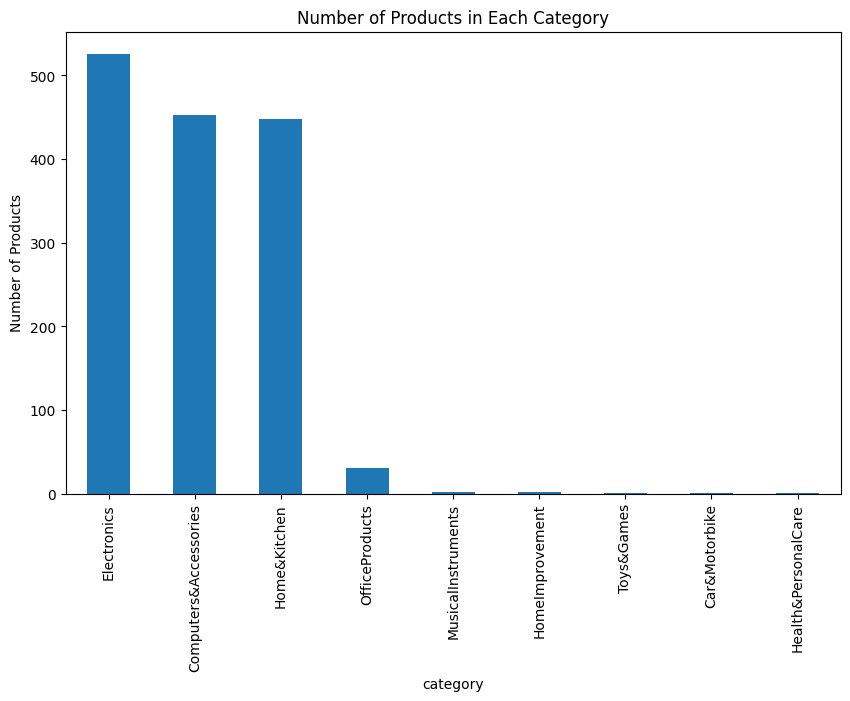

In [10]:
import matplotlib.pyplot as plt

category_counts = df1['category_1'].value_counts()

category_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Products in Each Category')
plt.xlabel('category')
plt.ylabel('Number of Products')

plt.xticks(rotation='vertical')

plt.show()

In [11]:
df1['discount_percentage']

0       64%
1       43%
2       90%
3       53%
4       61%
       ... 
1460    59%
1461    25%
1462    28%
1463    26%
1464    22%
Name: discount_percentage, Length: 1465, dtype: object

In [12]:
df1['discount_percentage'] = df1['discount_percentage'].astype(str).str.replace('%', '')
df1['discount_percentage'] = pd.to_numeric(df1['discount_percentage'], errors='coerce')
df1['discount_percentage'].mean()

47.69146757679181

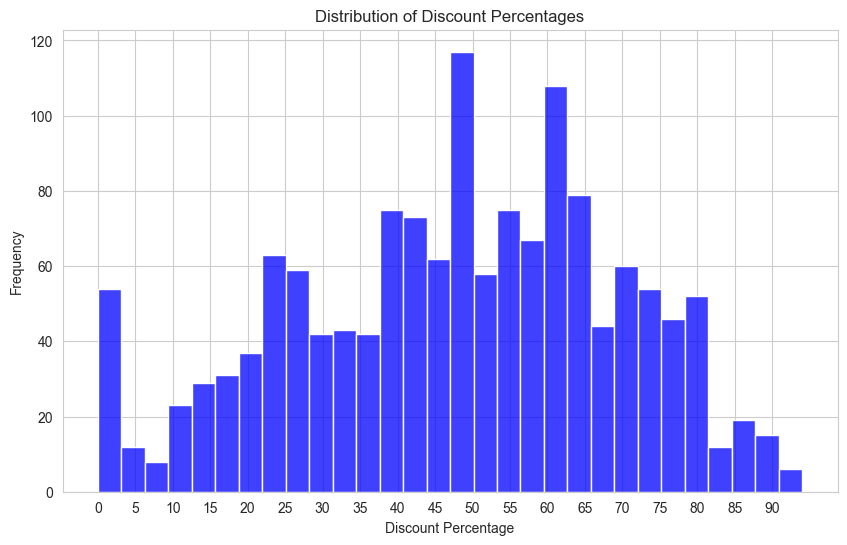

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the histogram for the discount_percentage column
plt.figure(figsize=(10, 6))
sns.histplot(df1['discount_percentage'], kde=False, bins=30, color='blue')

plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.xticks(range(0, int(df1['discount_percentage'].max())+1, 5))

plt.show()


In [31]:
#Finding unusual string in the rating column

df1['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    182
3.9    123
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      3
4.8      3
3.2      2
5.0      2
2.8      2
2.3      1
2.0      1
2.6      1
2.9      1
Name: count, dtype: int64

In [34]:
df1['rating_count'] = df1['rating_count'].astype(str).str.replace(',', '')
df1['rating_count'] = pd.to_numeric(df1['rating_count'], errors='coerce')

In [35]:
df1.query('rating == "|"')

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,category_3,category_4


In [36]:
# In Python, the float() function expects a dot (.) as the decimal separator.
df1['rating'] = df1['rating'].astype(str).str.replace(',', '')
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce')

In [37]:
nan_cols = df1.columns[df1.isnull().any()].tolist()
# print(nan_cols)

nan_rows = df1[df1['rating_count'].isnull()]

df1['rating_count']
nan_rating_count = df1[df1['rating_count'].isnull()]

df1 = df1.dropna(subset=['rating_count'])


In [49]:
#Changing the data type of discounted price and actual price
df1['discounted_price'] = df1['discounted_price'].astype(str).str.replace("₹",'')
df1['discounted_price'] = df1['discounted_price'].astype('float64')

df1['actual_price'] = df1['actual_price'].astype(str).str.replace("₹",'')
df1['actual_price'] = df1['actual_price'].astype('float64')



In [68]:
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

Xl = df1[['actual_price', 'rating', 'rating_count']]
yl = df1['discounted_price']

# Splitting the dataset into training and testing sets
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, random_state=21, test_size=0.3)


print("Number of rows in Xl_train: ", len(Xl_train))
print("Number of rows in Xl_test: ", len(Xl_test))
print("Number of rows in yl_train: ", len(yl_train))
print("Number of rows in yl_test: ", len(yl_test))

# Initializing and fitting the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(Xl_train, yl_train)

linear_predict = linear_model.predict(Xl_test)

# Evaluating the model
linear_score = linear_model.score(Xl_test, yl_test)
print(f'Linear Regression score: {linear_score}')

print(f'Coefficients: {linear_model.coef_}')


Number of rows in Xl_train:  1024
Number of rows in Xl_test:  439
Number of rows in yl_train:  1024
Number of rows in yl_test:  439
Linear Regression score: 0.8975404541500936
Coefficients: [6.21644950e-01 1.16628328e+02 1.13744142e-03]


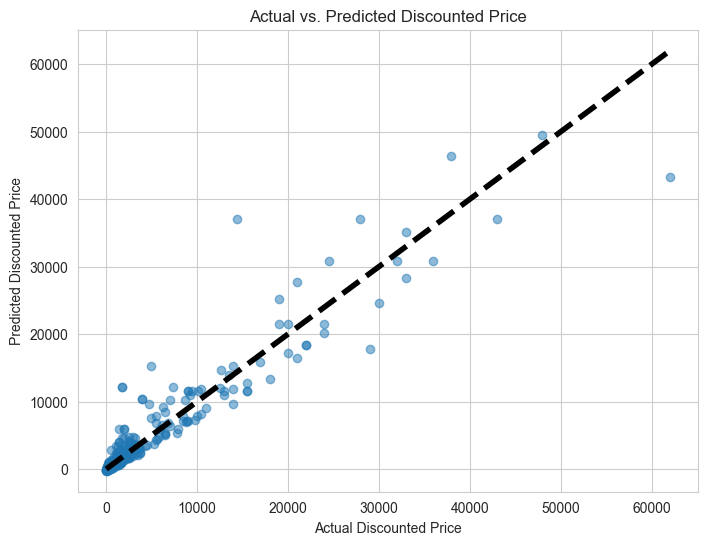

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(yl_test, linear_predict, alpha=0.5)
plt.plot([yl_test.min(), yl_test.max()], [yl_test.min(), yl_test.max()], 'k--', lw=4)
plt.xlabel('Actual Discounted Price')
plt.ylabel('Predicted Discounted Price')
plt.title('Actual vs. Predicted Discounted Price')
plt.show()


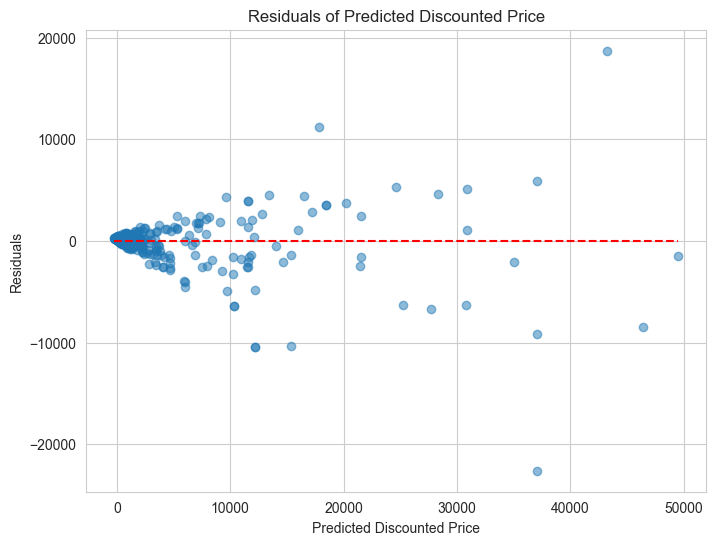

In [73]:
residuals = yl_test - linear_predict

plt.figure(figsize=(8, 6))
plt.scatter(linear_predict, residuals, alpha=0.5)
plt.hlines(y=0, xmin=linear_predict.min(), xmax=linear_predict.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Discounted Price')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted Discounted Price')
plt.show()
